# WeatherPy
----

### Analysis
* The southern hemisphere's (negative latitudes in the graphs) summer has just ended, but the "Latitude vs. Max Temperature" graph shows temperatures slightly but noticeably higher in that hemisphere.
* The humidity is highest at the Equator and at higher latitudes, with the lowest points right at the tropics (+/-23.7deg), probably due to atmospheric circulatory patterns.
* The cloud cover does not change with latitude. It's interesting to notice that the values are not given by instruments, but by observers, so in the sample analyzed, the values tend to be 0, 20, 40, 75 and 90 percent. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
cit = [] # city (only the ones)
ctr = [] #country
lat = [] #latitude
lon = [] #longitude
day = [] #date
tmp = [] #max temp
hum = [] #humidity
cld = [] #cloudiness
win = [] #wind speed

# Setup a counter for printing with the cities retrieved from the queries
counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cit.append(response['name'])
        ctr.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        day.append(response['dt'])
        tmp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cld.append(response['clouds']['all'])
        win.append(response['wind']['speed'])
        print("Processing record " + str(counter) + " for " + city)
        counter += 1
    except:
        print(f"The city of {city} was not found.")

Processing record 0 for rikitea
Processing record 1 for new norfolk
Processing record 2 for karratha
Processing record 3 for olinda
Processing record 4 for provideniya
Processing record 5 for laguna
Processing record 6 for katsuura
Processing record 7 for nanortalik
Processing record 8 for wamba
Processing record 9 for codo
Processing record 10 for port elizabeth
Processing record 11 for sao joao da barra
Processing record 12 for bethel
Processing record 13 for martil
Processing record 14 for punta arenas
Processing record 15 for novo aripuana
Processing record 16 for lebu
Processing record 17 for chokurdakh
Processing record 18 for tasiilaq
Processing record 19 for tuktoyaktuk
Processing record 20 for kaitangata
Processing record 21 for klaksvik
Processing record 22 for carnarvon
Processing record 23 for college
Processing record 24 for east london
Processing record 25 for mataura
The city of samusu was not found.
Processing record 26 for port alfred
Processing record 27 for hermanus


The city of nizhneyansk was not found.
Processing record 206 for popondetta
Processing record 207 for klyuchi
Processing record 208 for lieksa
Processing record 209 for leningradskiy
Processing record 210 for nouakchott
Processing record 211 for warmbad
Processing record 212 for half moon bay
Processing record 213 for sandi
Processing record 214 for dingle
Processing record 215 for baykit
Processing record 216 for san luis
Processing record 217 for adrar
Processing record 218 for samarai
Processing record 219 for monrovia
Processing record 220 for beringovskiy
Processing record 221 for yulara
Processing record 222 for doha
Processing record 223 for porto novo
Processing record 224 for mananjary
Processing record 225 for tuatapere
The city of marcona was not found.
Processing record 226 for berlevag
The city of makung was not found.
Processing record 227 for port macquarie
Processing record 228 for mudgee
Processing record 229 for mastung
Processing record 230 for katangli
Processing re

Processing record 416 for leh
Processing record 417 for morogoro
Processing record 418 for graaff-reinet
Processing record 419 for nabire
Processing record 420 for kushima
Processing record 421 for namibe
Processing record 422 for tarabha
Processing record 423 for fundao
The city of aalestrup was not found.
The city of vaitupu was not found.
Processing record 424 for dzhebariki-khaya
The city of kyra was not found.
Processing record 425 for gusau
Processing record 426 for auki
Processing record 427 for najran
Processing record 428 for morondava
Processing record 429 for ha giang
Processing record 430 for asyut
Processing record 431 for teguise
Processing record 432 for seminole
Processing record 433 for chake chake
Processing record 434 for rock sound
Processing record 435 for tianpeng
Processing record 436 for myitkyina
Processing record 437 for saint-augustin
Processing record 438 for buala
Processing record 439 for neuquen
Processing record 440 for kibuye
Processing record 441 for k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = pd.DataFrame(
    {'City': cit,
     'Cloudiness': cld,
     'Country': ctr,
     'Date' : day,
     'Humidity' : hum,
     'Lat' : lat,
     'Lon' : lon,
     'Max Temp' : tmp,
     'Wind Speed' : win
    })

# Write to csv
weather_df.to_csv(output_data_file, index=False) # defined in the first cell: cities.csv

weather_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lon           550
Max Temp      550
Wind Speed    550
dtype: int64

In [10]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Rikitea,88,PF,1553308378,100,-23.12,-134.97,78.35,18.84
1,New Norfolk,75,AU,1553308516,46,-42.78,147.06,73.99,11.41
2,Karratha,92,AU,1553308556,63,-20.74,116.85,86.72,31.59
3,Olinda,75,EC,1553306400,74,-2.03,-79.75,84.20,8.05
4,Provideniya,92,RU,1553308557,100,64.42,-173.23,15.62,13.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [2]:
'''
Note to TA: Ignore this box. 
            I inserted it here so I would not have to rerun the queries. Instead I read the
            csv already created.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import time

output_data_file = "output_data/cities.csv"

# Read the City and Ride Data
weather_df = pd.read_csv(output_data_file)
'''

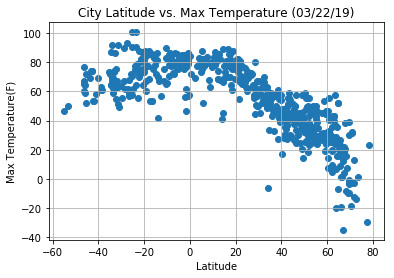

In [3]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Incorporate the other graph properties

# Convert unix time to date
unixtime = weather_df.iloc[1,3]
date = time.strftime("%x", time.localtime(unixtime))

plt.title("City Latitude vs. Max Temperature (" + str(date) +")")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("images/Latitude_vs_Max_Temp.png",bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

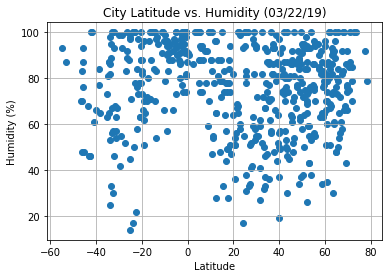

In [4]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + str(date) +")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("images/Latitude_vs_Humidity.png",bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

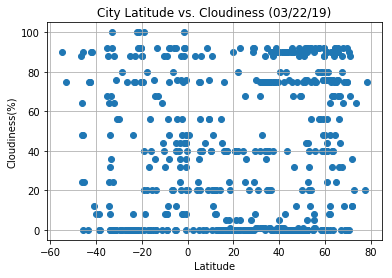

In [5]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + str(date) +")")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("images/Latitude_vs_Cloudiness.png",bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

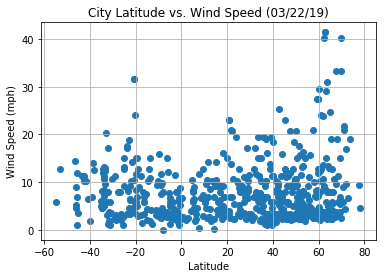

In [6]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties

# Convert unix time to date
unixtime = weather_df.iloc[1,3]
date = time.strftime("%x", time.localtime(unixtime))

plt.title("City Latitude vs. Wind Speed (" + str(date) +")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("images/Latitude_vs_Wind_Speed.png",bbox_inches="tight")

# Show plot
plt.show()